# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
%matplotlib inline


# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/eric/vcs/udacity/self_driving/traffic-signs-data/train.p'
validation_file= '/home/eric/vcs/udacity/self_driving/traffic-signs-data/valid.p'
testing_file = '/home/eric/vcs/udacity/self_driving/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
    
    
X_train_non_proc, y_train_non_proc = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation_non_proc, y_validation_non_proc = valid['features'], valid['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

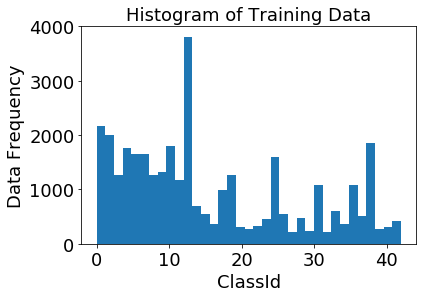

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
From the histogram we can see there are 43 classses


In [7]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train_non_proc)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_non_proc[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# let's look at the histogram of data after adding more points
# we should try to get a somewhat even distribution so that some are not amazingly trained

plt.hist(y_train_non_proc,bins='auto')
plt.xlabel('ClassId',fontsize=18)
plt.ylabel('Data Frequency',fontsize=18)
plt.title('Histogram of Training Data',fontsize=18)
plt.tick_params(axis='both',which='major',labelsize=18)
plt.show()

# number of validation images
n_validation = len(X_validation_non_proc)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("From the histogram we can see there are 43 classses")


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

31


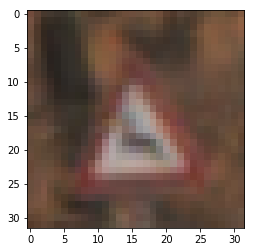

In [12]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
# Visualizations will be shown in the notebook.
%matplotlib inline


#index = random.randint(0, len(X_train))
index = 300
#image = X_train[index].squeeze()
image = X_train_non_proc[index];

#plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train_non_proc[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

[(0, 210), (19, 210), (37, 210), (27, 240), (32, 240), (41, 240), (42, 240), (24, 270), (29, 270), (39, 300), (21, 330), (20, 360), (40, 360), (22, 390), (36, 390), (6, 420), (16, 420), (34, 420), (30, 450), (23, 510), (28, 540), (26, 600), (15, 630), (33, 689), (14, 780), (31, 780), (17, 1110), (18, 1200), (35, 1200), (11, 1320), (3, 1410), (8, 1410), (7, 1440), (9, 1470), (25, 1500), (5, 1860), (4, 1980), (10, 2010), (38, 2070), (12, 2100), (13, 2160), (1, 2220), (2, 2250)]
Visualizing non-processed and processed images


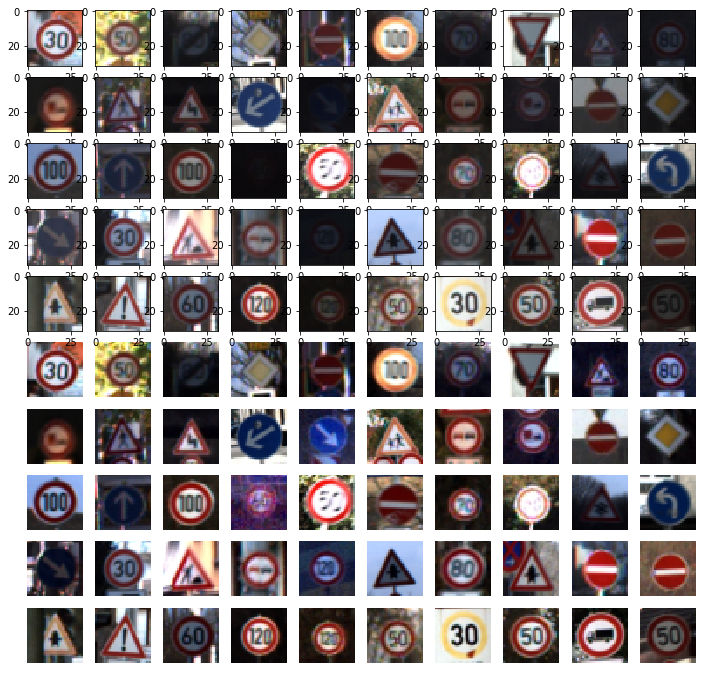

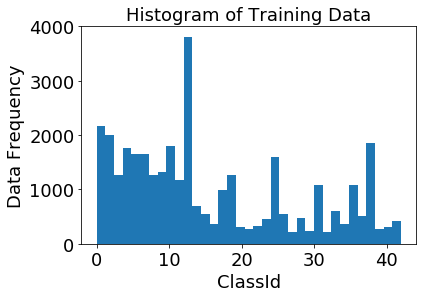

[  180.  1980.  2010.  1260.  1770.  1650.   360.  1290.  1260.  1320.
  1800.  1170.  1890.  1920.   690.   540.   360.   990.  1080.   180.
   300.   270.   330.   450.   240.  1350.   540.   210.   480.   240.
   390.   690.   210.   599.   360.  1080.   330.   180.  1860.   270.
   300.   210.   210.]
[ 2820.  1020.   990.  1740.  1230.  1350.  2640.  1710.  1740.  1680.
  1200.  1830.  1110.  1080.  2310.  2460.  2640.  2010.  1920.  2820.
  2700.  2730.  2670.  2550.  2760.  1650.  2460.  2790.  2520.  2760.
  2610.  2310.  2790.  2401.  2640.  1920.  2670.  2820.  1140.  2730.
  2700.  2790.  2790.]
[ 17.   2.   2.   3.   2.   2.   9.   3.   3.   3.   2.   3.   2.   2.   5.
   6.   9.   4.   3.  17.  10.  12.  10.   7.  13.   3.   6.  15.   7.  13.
   8.   5.  15.   6.   9.   3.  10.  17.   2.  12.  10.  15.  15.]
[ 3060.  3960.  4020.  3780.  3540.  3300.  3240.  3870.  3780.  3960.
  3600.  3510.  3780.  3840.  3450.  3240.  3240.  3960.  3240.  3060.
  3000.  3240.  3300.  31

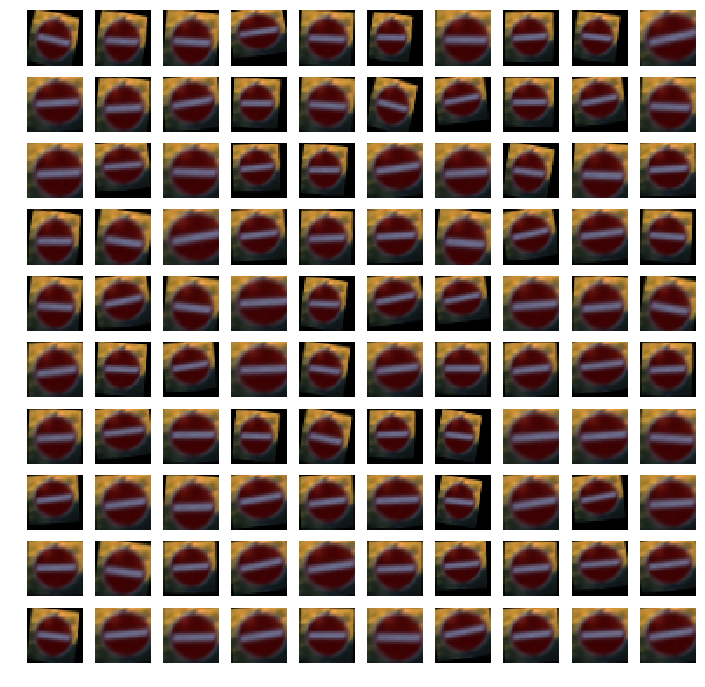

X_train is size 34799
Generation of additional data started...
Generation of additional data complete
X_train_final is size 146574
y_train_final is size 146574
[ 17.   2.   2.   3.   2.   2.   9.   3.   3.   3.   2.   3.   2.   2.   5.
   6.   9.   4.   3.  17.  10.  12.  10.   7.  13.   3.   6.  15.   7.  13.
   8.   5.  15.   6.   9.   3.  10.  17.   2.  12.  10.  15.  15.]
3060
count_array: [ 3060.  3960.  4020.  3780.  3540.  3300.  3240.  3870.  3780.  3960.
  3600.  3510.  3780.  3840.  3450.  3240.  3240.  3960.  3240.  3060.
  3000.  3240.  3300.  3150.  3120.  4050.  3240.  3150.  3360.  3120.
  3120.  3450.  3150.  3594.  3240.  3240.  3300.  3060.  3720.  3240.
  3000.  3150.  3150.]
181373.0
y_train_counts: [  180.  1980.  2010.  1260.  1770.  1650.   360.  1290.  1260.  1320.
  1800.  1170.  1890.  1920.   690.   540.   360.   990.  1080.   180.
   300.   270.   330.   450.   240.  1350.   540.   210.   480.   240.
   390.   690.   210.   599.   360.  1080.   330.   180.  

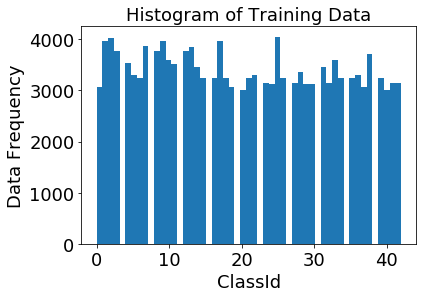

In [13]:
# IMAGE PRE-PROCESSING
X_train = []
y_train = []
X_validation = []
y_validation = []

all_images = dict()
images = dict()


for i, (image, label) in enumerate(zip(X_train_non_proc, y_train_non_proc)):
    if label not in all_images:
        all_images[label] = []
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_train.append(norm_image)
    y_train.append(label)
    images[label] = norm_image
    all_images[label].append(norm_image)
    
    
for i, (image, label) in enumerate(zip(X_validation_non_proc, y_validation_non_proc)):
    if label not in all_images:
        all_images[label] = []
    zeros = np.zeros((32,32,3))
    norm_image = cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    X_validation.append(norm_image)
    y_validation.append(label)
    images[label] = norm_image
    all_images[label].append(norm_image)
    
    
images_labels = list(all_images.keys())
images_labels = [(key, len(all_images[key])) for key in images_labels]
images_labels = sorted(images_labels, key=lambda x: x[1])
print(images_labels)

### PREPROCESSING STEP: Compare preprocessed images (top half of grid below) to raw images (bottom half of grid below)
print("Visualizing non-processed and processed images")
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02)
plt.figure(figsize=(12,12))
j=51
for i in range(50):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    index = random.randint(0, len(X_train))
    image  = X_train[index].squeeze()
    img = X_train_non_proc[index].squeeze()
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.subplot(10,10,j)
    j=j+1
    plt.imshow(image)
    plt.axis('off')
plt.show()




# let's look at the histogram of data before adding more points
# we should try to get a somewhat even distribution so that some are not amazingly trained

plt.hist(y_train,bins='auto')
plt.xlabel('ClassId',fontsize=18)
plt.ylabel('Data Frequency',fontsize=18)
plt.title('Histogram of Training Data',fontsize=18)
plt.tick_params(axis='both',which='major',labelsize=18)
plt.show()


# adding simulated images
# figure out how many samples from each class we have and how many to add with simulated data points
#y_train_counts = [0] * 43
y_train_counts = np.zeros(43)


for i in y_train:
    y_train_counts[i] = y_train_counts[i]+1
    
    
print(y_train_counts)

#const_count_list = [2000]*43
const_counts = np.ones(43)*3000 # counts = 3000 gave us 0.912 validation accuracy



num_y_train_to_add = np.subtract(const_counts, y_train_counts)

print(num_y_train_to_add)

num_of_each_image_to_add = np.add(np.ceil(np.divide(num_y_train_to_add, y_train_counts)),1)

print(num_of_each_image_to_add)

total_length_array = np.multiply(y_train_counts,num_of_each_image_to_add)

print(total_length_array)

counts = np.sum(total_length_array)

print(counts)

print(y_train)

# total length array is just an integer representation of counts
total_length = 146574



def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot      = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M        = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x    = trans_range*np.random.uniform()-trans_range/2
    tr_y    = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    #img = augment_brightness_camera_images(img)
        
    return img

### ADDITIONAL DATA: Sample and Plot Transformed Images

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
index = random.randint(0, len(X_train))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    image = X_train[index].squeeze()
    img = transform_image(image,15,5,0)
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


### ADDITIONAL DATA: Add transformed images

r = len(X_train)

total_length = int(counts)

num2add = num_of_each_image_to_add

X_train_final = np.empty([total_length,32,32,3])
y_train_final = np.empty([total_length,1])

rot_limit = 15
shear_limit = 5
displacement_limit = 4

print('X_train is size',r)
print('Generation of additional data started...')
j=0

count0 = 0
count1 = 0

count_array = np.zeros(43)
# iterate over every image in X_train
for idx in range(r):
    # load the image
    rawimage = X_train[idx].squeeze()
    # iterate over every image to add
    for jdx in range(int(num_of_each_image_to_add[y_train[idx]])): 
        # create the transformed image to add to x_train
        procimg = transform_image(rawimage,rot_limit,shear_limit,displacement_limit) 
        # add the image to x_train
        X_train_final[j] = procimg
        # add the class to y_train
        y_train_final[j] = y_train[idx]
        j=j+1
        
        count_array[int(y_train[idx])] += 1
        
        if(int(y_train[idx]) == 0):
            count0 = count0+1
            
        if(int(y_train[idx]) == 1):
            count1 = count1+1
        
print('Generation of additional data complete')
print('X_train_final is size',len(X_train_final))
print('y_train_final is size',len(y_train_final))

print(num_of_each_image_to_add)
print(count0)


y_train_final_counts = np.zeros(43)
y_train_final.astype(int)


print("count_array: {}".format(count_array))
print(np.sum(np.add(count_array,y_train_counts)))

print("y_train_counts: {}".format(y_train_counts))

#range(int(num_of_each_image_to_add[y_train[0]]))
y_train[0]
int(num_of_each_image_to_add[y_train[0]])

for i in y_train_final:
    i = int(i)
    y_train_final_counts[i] = y_train_final_counts[i]+1


print("y_train_final_counts: {}".format(y_train_final_counts))
print("y_train_final_counts: {}".format(np.sum(y_train_final_counts)))
print("total elements in count_array : {}".format(np.sum(count_array)))
print("length of original x_train: {}".format(len(X_train)))
difference = np.sum(y_train_final_counts) - len(X_train)
print("diff between length of final counts and x_train: {}".format(difference))

# let's look at the histogram of data after adding more points
# we should try to get a somewhat even distribution so that some are not amazingly trained

# shows that we have a ton of class id 1, but I don't see how this is possible
print("Histogram of training data set with additional images")
plt.hist(y_train_final,bins='auto')
plt.xlabel('ClassId',fontsize=18)
plt.ylabel('Data Frequency',fontsize=18)
plt.title('Histogram of Training Data',fontsize=18)
plt.tick_params(axis='both',which='major',labelsize=18)
plt.show()


In [14]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_validation, y_validation = shuffle(X_validation, y_validation)

### Model Architecture

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation and dropout.
    fc1    = tf.nn.relu(fc1)
    fc1  = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation and dropout
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)

rate = 0.001
EPOCHS = 100
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            
        training_accuracy = evaluate(X_train,y_train)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, 'model')
    print("Model saved")




Training...

EPOCH 1 ...
Training Accuracy = 0.678
Validation Accuracy = 0.617

EPOCH 2 ...
Training Accuracy = 0.849
Validation Accuracy = 0.791

EPOCH 3 ...
Training Accuracy = 0.913
Validation Accuracy = 0.867

EPOCH 4 ...
Training Accuracy = 0.940
Validation Accuracy = 0.895

EPOCH 5 ...
Training Accuracy = 0.957
Validation Accuracy = 0.905

EPOCH 6 ...
Training Accuracy = 0.966
Validation Accuracy = 0.925

EPOCH 7 ...
Training Accuracy = 0.974
Validation Accuracy = 0.927

EPOCH 8 ...
Training Accuracy = 0.977
Validation Accuracy = 0.935

EPOCH 9 ...
Training Accuracy = 0.981
Validation Accuracy = 0.935

EPOCH 10 ...
Training Accuracy = 0.985
Validation Accuracy = 0.940

EPOCH 11 ...
Training Accuracy = 0.986
Validation Accuracy = 0.946

EPOCH 12 ...
Training Accuracy = 0.988
Validation Accuracy = 0.937

EPOCH 13 ...
Training Accuracy = 0.990
Validation Accuracy = 0.941

EPOCH 14 ...
Training Accuracy = 0.990
Validation Accuracy = 0.950

EPOCH 15 ...
Training Accuracy = 0.992
Valid

In [23]:
# Let's test it on the test set

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.939


The validation accuracy of approximate 0.97 and test accuracty of 0.939 indicates that the model was trained decently well and not a large amount of overfitting occurred.  I probably should have also stopped training after ~50 epochs since it appears a minima was reached by this time.


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

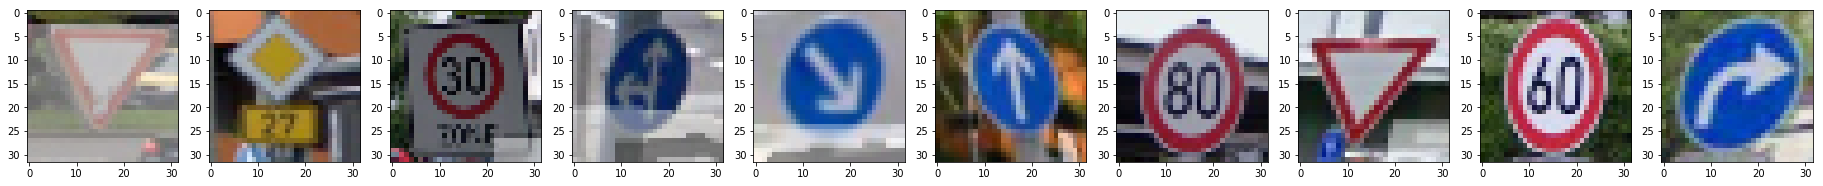

In [50]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

german1 = cv2.imread('german_sign_11.png') # label = 13 (yield sign)
german1 = cv2.resize(german1, (32,32))
german1  = cv2.cvtColor(german1,cv2.COLOR_BGR2RGB)
german1 = cv2.normalize(german1, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

german2 = cv2.imread('german_sign_2.png') # label = 12
german2 = cv2.resize(german2, (32,32))
german2  = cv2.cvtColor(german2,cv2.COLOR_BGR2RGB)
german2 = cv2.normalize(german2, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

german3 = cv2.imread('german_sign_3.png') # label = 1 (trickier version though)
german3 = cv2.resize(german3, (32,32))
german3  = cv2.cvtColor(german3,cv2.COLOR_BGR2RGB)
german3 = cv2.normalize(german3, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

german4 = cv2.imread('german_sign_12.png') # label = 38 (blue forward and left turn lanes)
german4 = cv2.resize(german4, (32,32))
german4  = cv2.cvtColor(german4,cv2.COLOR_BGR2RGB)
german4 = cv2.normalize(german4, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

german5 = cv2.imread('german_sign_13.png') # label = 39 (downward right arrow)
german5 = cv2.resize(german5, (32,32))
german5  = cv2.cvtColor(german5,cv2.COLOR_BGR2RGB)
german5 = cv2.normalize(german5, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

german6 = cv2.imread('german_sign_14.png') # label = 35 (forward blue arrow)
german6 = cv2.resize(german6, (32,32))
german6  = cv2.cvtColor(german6,cv2.COLOR_BGR2RGB)
german6 = cv2.normalize(german6, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

german7 = cv2.imread('german_sign_15.png') # label = 5 (80 kmh speed zone)
german7 = cv2.resize(german7, (32,32))
german7  = cv2.cvtColor(german7,cv2.COLOR_BGR2RGB)
german7 = cv2.normalize(german7, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

german8 = cv2.imread('german_sign_8.png') # label = 13 (yield sign)
german8 = cv2.resize(german8, (32,32))
german8  = cv2.cvtColor(german8,cv2.COLOR_BGR2RGB)
german8 = cv2.normalize(german8, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

german9 = cv2.imread('german_sign_16.png') # label = 3 (60 kmh speed zone)
german9 = cv2.resize(german9, (32,32))
german9  = cv2.cvtColor(german9,cv2.COLOR_BGR2RGB)
german9 = cv2.normalize(german9, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

german10 = cv2.imread('german_sign_10.png') # label = 33 (blue right turn sign)
german10 = cv2.resize(german10, (32,32))
german10  = cv2.cvtColor(german10,cv2.COLOR_BGR2RGB)
german10 = cv2.normalize(german10, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)


# collect images into structure
#

X_sampletests    = np.empty([10,32,32,3])
Y_sampletests    = np.empty([10])
X_sampletests[0] = german1
Y_sampletests[0] = 13
X_sampletests[1] = german2
Y_sampletests[1] = 12
X_sampletests[2] = german3
Y_sampletests[2] = 1
X_sampletests[3] = german4
Y_sampletests[3] = 37
X_sampletests[4] = german5
Y_sampletests[4] = 38
X_sampletests[5] = german6
Y_sampletests[5] = 35
X_sampletests[6] = german7
Y_sampletests[6] = 5
X_sampletests[7] = german8
Y_sampletests[7] = 13
X_sampletests[8] = german9
Y_sampletests[8] = 3
X_sampletests[9] = german10
Y_sampletests[9] = 33




#
# Plot Raw Images
#

gs2 = gridspec.GridSpec(1, 5)
gs2.update(wspace=0.01, hspace=0.02)
plt.figure(figsize=(32,32))
ax2 = plt.subplot(gs2[0])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_aspect('equal')
plt.subplot(1,10,1)
plt.imshow(german1)
plt.subplot(1,10,2)
plt.imshow(german2)
plt.subplot(1,10,3)
plt.imshow(german3)
plt.subplot(1,10,4)
plt.imshow(german4)
plt.subplot(1,10,5)
plt.imshow(german5)
plt.subplot(1,10,6)
plt.imshow(german6)
plt.subplot(1,10,7)
plt.imshow(german7)
plt.subplot(1,10,8)
plt.imshow(german8)
plt.subplot(1,10,9)
plt.imshow(german9)
plt.subplot(1,10,10)
plt.imshow(german10)



### Predict the Sign Type for Each Image

In [51]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

prediction = tf.argmax(tf.nn.softmax(logits),1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #tf.train.import_meta_graph('model.meta')
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    pred = sess.run(prediction,feed_dict={x:X_sampletests, keep_prob:1} )
    
print('Prediction1:',pred[0],'Truth:',Y_sampletests[0])
print('Prediction2:',pred[1],'Truth:',Y_sampletests[1])
print('Prediction3:',pred[2],'Truth:',Y_sampletests[2])
print('Prediction4:',pred[3],'Truth:',Y_sampletests[3])
print('Prediction5:',pred[4],'Truth:',Y_sampletests[4])
print('Prediction6:',pred[5],'Truth:',Y_sampletests[5])
print('Prediction7:',pred[6],'Truth:',Y_sampletests[6])
print('Prediction8:',pred[7],'Truth:',Y_sampletests[7])
print('Prediction9:',pred[8],'Truth:',Y_sampletests[8])
print('Prediction10:',pred[9],'Truth:',Y_sampletests[9])




acc = 7/10
print('Accuracy:',acc)

# sign number 3 is essentially extra credit since it's harder, but still got it wrong

Prediction1: 13 Truth: 13.0
Prediction2: 13 Truth: 12.0
Prediction3: 0 Truth: 1.0
Prediction4: 38 Truth: 37.0
Prediction5: 38 Truth: 38.0
Prediction6: 35 Truth: 35.0
Prediction7: 5 Truth: 5.0
Prediction8: 13 Truth: 13.0
Prediction9: 3 Truth: 3.0
Prediction10: 33 Truth: 33.0
Accuracy: 0.7


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [49]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


softmax = tf.nn.softmax(logits)
top5    = tf.nn.top_k(softmax, k=5, sorted=True, name=None) 

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    saver.restore(session,tf.train.latest_checkpoint('./'))
    top5_pred = session.run(top5, feed_dict = {x: X_sampletests, keep_prob : 1})
    top5_pred_sftmax = top5_pred[0]
    top5_pred_labels = top5_pred[1]
    print(top5_pred_sftmax)
    print(top5_pred_labels)

# What's interesting from this code segment is that two of the misclassified signs were very certain of their classification    
# 2: 93.6%   3: 42.1%    5: 99.9%


[[  1.00000000e+00   1.74862458e-09   1.19286558e-09   2.93425839e-10
    2.76558854e-12]
 [  9.36056316e-01   2.93303020e-02   2.37668548e-02   5.09147532e-03
    1.87560869e-03]
 [  4.21573937e-01   3.20553124e-01   1.28147677e-01   7.95770288e-02
    2.97425408e-02]
 [  6.97401404e-01   2.81337142e-01   9.95736010e-03   4.66313260e-03
    4.08458710e-03]
 [  9.99999642e-01   4.04562599e-07   1.19113546e-08   3.77943987e-12
    2.03227371e-16]
 [  9.99999762e-01   2.00251847e-07   8.05839340e-10   2.67240466e-11
    1.69066909e-13]
 [  9.99988079e-01   1.19329525e-05   8.02590328e-10   7.28040631e-12
    7.23887692e-13]
 [  1.00000000e+00   1.32480462e-08   4.87611063e-09   4.08645284e-10
    2.49856080e-10]
 [  1.00000000e+00   8.03413054e-14   1.13187284e-17   2.27270953e-22
    8.50101881e-23]
 [  1.00000000e+00   9.70876703e-15   4.13535937e-16   1.25330939e-16
    6.49483541e-20]]
[[13 12 25 38 35]
 [13  9 15 14 12]
 [ 0  1  8 13 38]
 [38 37 36 35 40]
 [38 34 36 32 41]
 [35 37 3

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 